In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define the ResNet50 model
def resnet50_model(input_size=(128, 128, 3), num_classes=8): # Change num_classes to 8
    base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_size)

    for layer in base_model.layers:
        layer.trainable = False  # Freeze the layers

    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # 8 classes for classification
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Load data using ImageDataGenerator
def load_data():
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # Use 20% for validation

    # Load training data
    train_generator = datagen.flow_from_directory(
        '/content/drive/MyDrive/archive (15)/NEU Metal Surface Defects Data/train',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        subset='training'
    )

    # Load validation data
    valid_generator = datagen.flow_from_directory(
        '/content/drive/MyDrive/archive (15)/NEU Metal Surface Defects Data/train',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
    )

    # Load test data
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        '/content/drive/MyDrive/archive (15)/NEU Metal Surface Defects Data/test',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical'
    )

    return train_generator, valid_generator, test_generator


In [ ]:

model = resnet50_model()
model.summary()

# Load data
train_generator, valid_generator, test_generator = load_data()

# Train the model
model.fit(train_generator, epochs=10, validation_data=valid_generator,
          steps_per_epoch=train_generator.samples // train_generator.batch_size,
          validation_steps=valid_generator.samples // valid_generator.batch_size)

# Save the trained model
model.save('resnet50_metal_surface_defects_model.h5')



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 4, 4, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 8)                   │           2,056 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,978,632 (121.99 MB)

 Trainable params: 8,390,920 (32.01 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Found 1326 images belonging to 8 classes.
Found 330 images belonging to 8 classes.
Found 72 images belonging to 8 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


41/41 ━━━━━━━━━━━━━━━━━━━━ 258s 5s/step - accuracy: 0.1792 - loss: 2.2802 - val_accuracy: 0.1969 - val_loss: 1.7229
Epoch 2/10
 1/41 ━━━━━━━━━━━━━━━━━━━━ 1:24 2s/step - accuracy: 0.2500 - loss: 1.8509

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 943ms/step - accuracy: 0.2500 - loss: 1.8509 - val_accuracy: 0.3000 - val_loss: 1.6215
Epoch 3/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 147s 3s/step - accuracy: 0.2495 - loss: 1.7649 - val_accuracy: 0.2812 - val_loss: 1.6367
Epoch 4/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2188 - loss: 1.7025 - val_accuracy: 0.3000 - val_loss: 1.6078
Epoch 5/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 140s 3s/step - accuracy: 0.3055 - loss: 1.6744 - val_accuracy: 0.3625 - val_loss: 1.5642
Epoch 6/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3125 - loss: 1.6262 - val_accuracy: 0.1000 - val_loss: 1.8145
Epoch 7/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.3119 - loss: 1.6104 - val_accuracy: 0.5031 - val_loss: 1.5260
Epoch 8/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4062 - loss: 1.5781 - val_accuracy: 0.7000 - val_loss: 1.4379
Epoch 9/10
41/41 ━━━━━━━━━━━━━━━━━━━━ 111s 3s/step - accuracy: 0.3548 - loss: 1.5440 - val_accuracy: 0.5219 - val_loss: 

In [ ]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.2f}')

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.5395 - loss: 1.4131
Test accuracy: 0.56


In [ ]:
def predict_image(model, image_path):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
    input_array = tf.keras.preprocessing.image.img_to_array(image)
    input_array = np.expand_dims(input_array, axis=0) / 255.0

    prediction = model.predict(input_array)
    predicted_class = np.argmax(prediction, axis=1)[0]

    # Map the predicted class to the actual label
    class_labels = list(test_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class]

    # Display the original image and the prediction result
    plt.imshow(image)
    plt.title(f'Prediction: {predicted_label}')
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


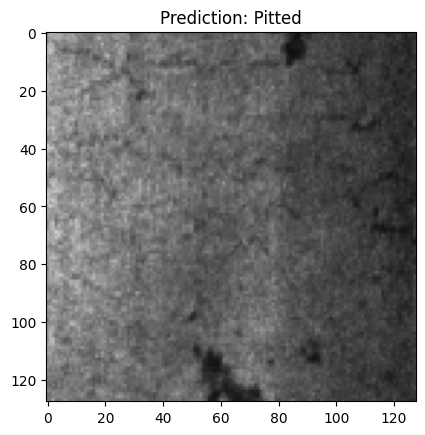

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step


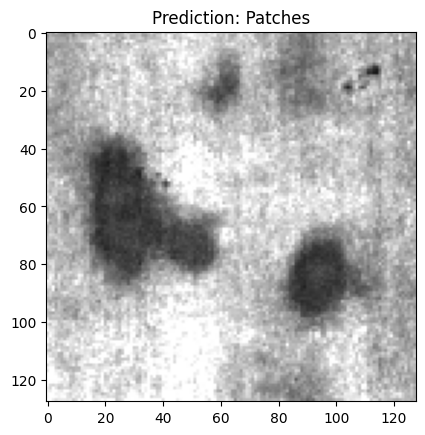

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


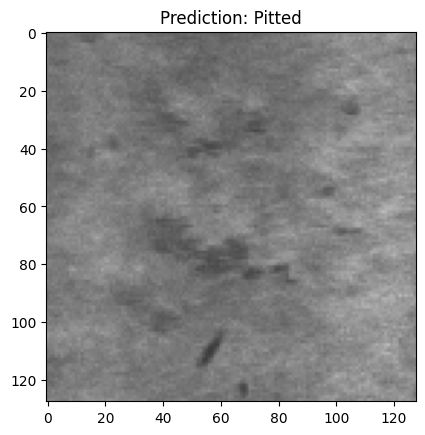

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


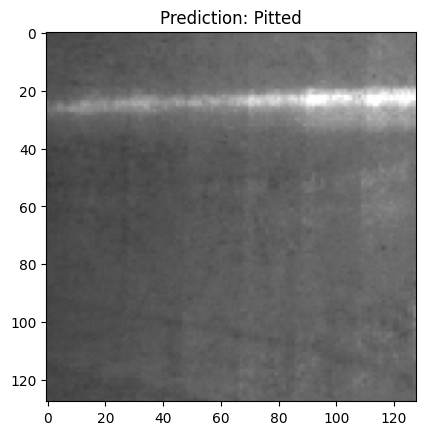

In [ ]:
# Load the saved model (when you want to use it for predictions)
model = load_model('resnet50_metal_surface_defects_model.h5')


predict_image(model, r"/content/drive/MyDrive/archive (15)/NEU Metal Surface Defects Data/test/Crazing/Cr_104.bmp")
predict_image(model, r"/content/drive/MyDrive/archive (15)/NEU Metal Surface Defects Data/test/Patches/Pa_102.bmp")
predict_image(model, r"/content/drive/MyDrive/archive (15)/NEU Metal Surface Defects Data/test/Rolled/RS_10.bmp")
predict_image(model, r"/content/drive/MyDrive/archive (15)/NEU Metal Surface Defects Data/test/Scratches/Sc_106.bmp")
